In [145]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, classification_report, accuracy_score

%matplotlib inline

In [146]:
scores=pd.read_csv("C:\\Users\\Mason\\Desktop\\port.csv", sep=';' )
scores.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13


In [147]:
target=scores.G3

In [148]:
data=scores

In [149]:
data['school']=pd.get_dummies(data.school)
data['sex']=pd.get_dummies(data.sex)
data['address']=pd.get_dummies(data.address)
data['famsize']=pd.get_dummies(data.famsize)
data['Pstatus']=pd.get_dummies(data.Pstatus)
data['schoolsup']=pd.get_dummies(data.schoolsup)
data['famsup']=pd.get_dummies(data.famsup)
data['paid']=pd.get_dummies(data.paid)
data['activities']=pd.get_dummies(data.activities)
data['nursery']=pd.get_dummies(data.nursery)
data['higher']=pd.get_dummies(data.higher)
data['internet']=pd.get_dummies(data.internet)
data['romantic']=pd.get_dummies(data.romantic)

In [150]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,1,18,0,1,1,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,1,1,17,0,1,0,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,1,1,15,0,0,0,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,1,1,15,0,1,0,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,1,1,16,0,1,0,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [151]:
Mjob=pd.get_dummies(data['Mjob'])
Fjob=pd.get_dummies(data['Fjob'])
reason=pd.get_dummies(data['reason'])
guardian=pd.get_dummies(data['guardian'])

In [152]:
data=data.drop(['Mjob', 'Fjob', 'reason', 'guardian'], axis=1)
df=pd.concat([data, Mjob], axis=1)
dff=pd.concat([df, Fjob], axis=1)
dfff=pd.concat([dff, reason], axis=1)
dffff=pd.concat([dfff, guardian], axis=1)

In [153]:
data=dffff

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 46 columns):
school        649 non-null uint8
sex           649 non-null uint8
age           649 non-null int64
address       649 non-null uint8
famsize       649 non-null uint8
Pstatus       649 non-null uint8
Medu          649 non-null int64
Fedu          649 non-null int64
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null uint8
famsup        649 non-null uint8
paid          649 non-null uint8
activities    649 non-null uint8
nursery       649 non-null uint8
higher        649 non-null uint8
internet      649 non-null uint8
romantic      649 non-null uint8
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 non-null int64
Walc          649 non-null int64
health        649 non-null int64
absences      649 non-null int64
G1            649 non-null int64
G2  

In [162]:
data['parentedu']=data.Medu+data.Fedu


Text(0.5,1,'Parent Education')

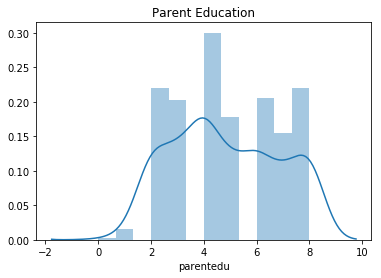

In [159]:
sns.distplot(data.parentedu)
plt.title('Parent Education')

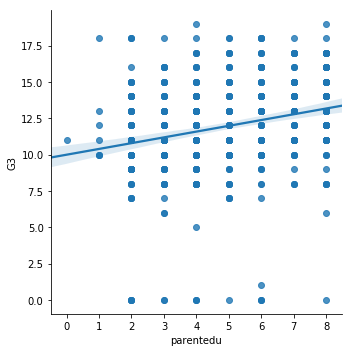

In [164]:
sns.lmplot(x="parentedu", y='G3', data=data)

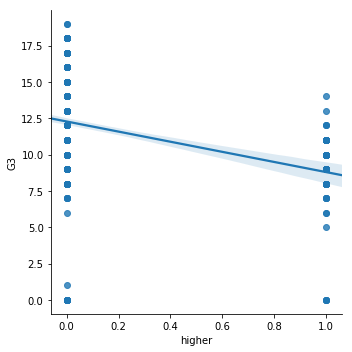

In [165]:
sns.lmplot(x="higher", y='G3', data=scores)

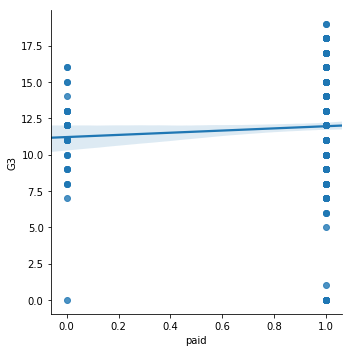

In [166]:
sns.lmplot(x="paid", y='G3', data=scores)

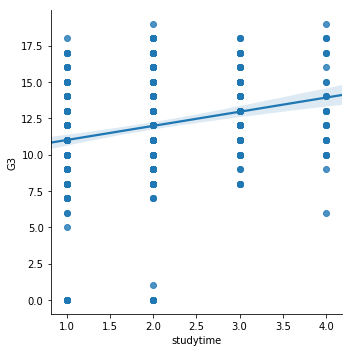

In [167]:
sns.lmplot(x="studytime", y='G3', data=scores)

In [168]:
data["social"]=data.goout+data.Dalc+data.Walc+data.freetime

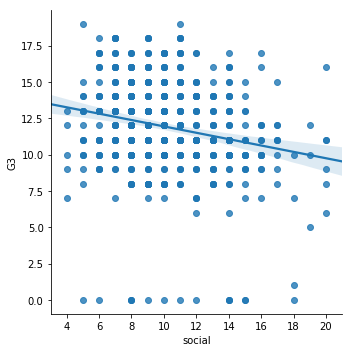

In [169]:
sns.lmplot(x="social", y='G3', data=data)

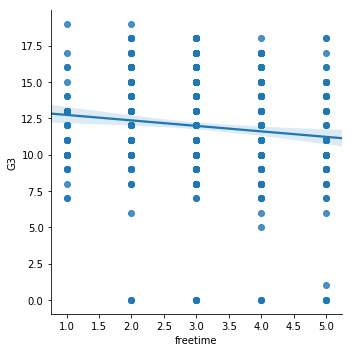

In [170]:
sns.lmplot(x="freetime", y='G3', data=scores)

In [171]:
for_corr=data
data=scores.drop(['G1','G2', 'G3'], axis=1)
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
dtype: int64

In [172]:
numbers=data.select_dtypes(include=[np.number])

In [173]:
scale=StandardScaler()
scale.fit(numbers)
scale_df=scale.transform(numbers)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(numbers,target, random_state=42, test_size=.33)

In [175]:
lr=linear_model.LinearRegression()
model=lr.fit(X_train, y_train)
predictions=model.predict(X_test)
print('RMSE is: \n', mean_squared_error(y_test, predictions))

RMSE is: 
 7.6119711748


Text(0.5,1,'Target Distribution')

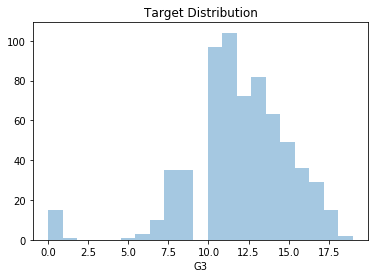

In [176]:
sns.distplot(target, kde=False)
plt.title('Target Distribution')


In [177]:
param_dist = {"eta0": [.001, .003, .01, .03, .1, .3, 1, 3], "tol": [.01, .001, .0001]}
n_iter_search= 8 
model=SGDRegressor()
random_search=RandomizedSearchCV(model, param_distributions=param_dist,
                                n_iter=n_iter_search, cv=3, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best Parameters: {}".format(random_search.best_params_))

Best Parameters: {'tol': 0.001, 'eta0': 0.003}


In [179]:
linear_regression_model = SGDRegressor(tol=.001, eta0=.003)
linear_regression_model.fit(X_train, y_train)
train_predictions = linear_regression_model.predict(X_train)
test_predictions = linear_regression_model.predict(X_test)

train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 2.8236965089938684
Test RMSE: 2.744090237674452


In [180]:
from sklearn.utils import resample
n_bootstraps = 1000
bootstrap_X = []
bootstrap_y = []
for _ in range(n_bootstraps):
    sample_X, sample_y = resample(scale_df, target)
    bootstrap_X.append(sample_X)
    bootstrap_y.append(sample_y)

In [181]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
coeffs = []
for i, data in enumerate(bootstrap_X):
    linear_regression_model.fit(data, bootstrap_y[i])
    coeffs.append(linear_regression_model.coef_)

In [182]:
sorted(list(zip(numbers.columns, linear_regression_model.coef_)), key=lambda coeff: abs(coeff[1]), reverse=True)

[('failures', -0.96370364701396416),
 ('school', 0.69165603789215002),
 ('Dalc', -0.64469785928436418),
 ('health', -0.49526788698701052),
 ('schoolsup', 0.38445461890301713),
 ('studytime', 0.33738987058473524),
 ('Fedu', 0.30871065994338454),
 ('sex', 0.28506136507349955),
 ('romantic', 0.2307207733902697),
 ('higher', -0.20517384620936643),
 ('freetime', -0.18299109269923022),
 ('internet', -0.18139503301101828),
 ('famrel', 0.15560771349516517),
 ('famsize', -0.13664219908606798),
 ('nursery', 0.11013140343551052),
 ('age', 0.10026457680460155),
 ('Medu', 0.059481384450187483),
 ('Walc', -0.059074558216507762),
 ('goout', 0.047483207127787121),
 ('Pstatus', -0.030440509917737561),
 ('traveltime', -0.030342748299211044),
 ('activities', -0.024758584078267736),
 ('address', -0.024530668628599823),
 ('absences', -0.02239282666622645),
 ('paid', -0.022152053071972964),
 ('famsup', 0.0025441660069434224)]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 26 Text xticklabel objects>)

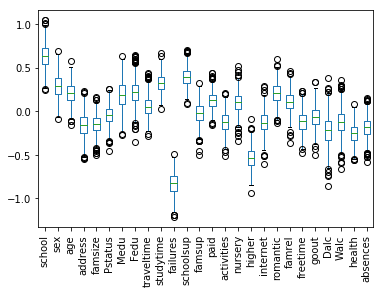

In [183]:
data_df=pd.DataFrame(data)
coef_df = pd.DataFrame(coeffs, columns=numbers.columns)
coef_df.plot(kind='box')
plt.xticks(rotation=90)

In [184]:

corr=for_corr.corr()
corr.sort_values(["G3"], ascending=False, inplace=True)
print(corr.G3)

G3            1.000000
G2            0.918548
G1            0.826387
school        0.284294
studytime     0.249789
parentedu     0.249217
Medu          0.240151
Fedu          0.211800
reputation    0.170944
teacher       0.134910
sex           0.129077
teacher       0.125916
health        0.101244
romantic      0.090583
schoolsup     0.066405
famrel        0.063361
paid          0.054898
father        0.051030
home          0.046537
health        0.039142
services      0.038447
Pstatus       0.000754
mother       -0.004415
other        -0.005301
nursery      -0.028752
at_home      -0.038904
famsize      -0.045016
services     -0.053204
famsup       -0.059206
other        -0.059251
activities   -0.059791
other        -0.080729
goout        -0.087641
absences     -0.091379
course       -0.098305
health       -0.098851
age          -0.106505
freetime     -0.122705
traveltime   -0.127173
other        -0.132577
at_home      -0.136778
internet     -0.150025
address      -0.167637
Walc       

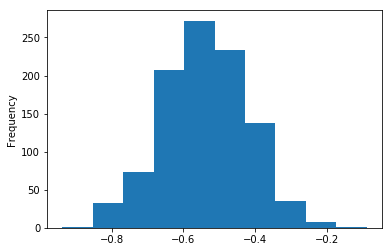

In [185]:
coef_df['higher'].plot(kind='hist')

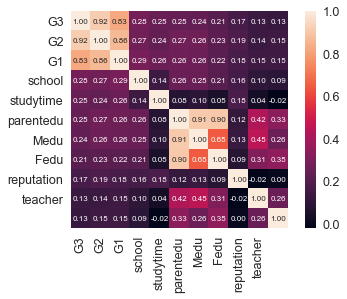

In [204]:
k=10
cor=corr.nlargest(k, "G3")['G3'].index
cm=np.corrcoef(for_corr[cor].values.T)
sns.set(font_scale=1.25)
heat=sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cor.values, xticklabels=cor.values)

In [187]:
from sklearn.linear_model import ElasticNetCV



clf = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], alphas=[.1, 1, 10])
model=clf.fit(X_train, y_train)
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
train_mse=mean_squared_error(y_train, train_predictions)
test_mse=mean_squared_error(y_test, test_predictions)
print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 2.658711718196816
Test RMSE: 2.7951003261773435


In [188]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='neg_mean_squared_error')
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


<module 'matplotlib.pyplot' from 'C:\\Users\\Mason\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

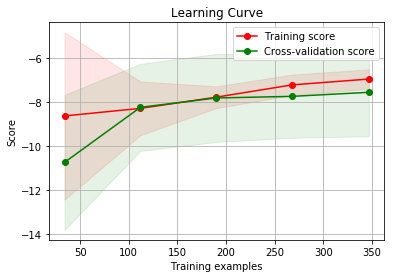

In [189]:
plot_learning_curve(model, "Learning Curve", X_train, y_train, cv=5)

In [190]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import f1_score, classification_report, accuracy_score, mean_squared_error

In [191]:
reg = KNeighborsRegressor()
gridsearch = GridSearchCV(reg, {"n_neighbors": [1, 3, 5, 7, 9, 11], "weights": ['uniform', 'distance'], 
                                'p': [1, 2, 3]}, scoring='neg_mean_squared_error')
grid=gridsearch.fit(X_train, y_train)
print("Best Params: {}".format(gridsearch.best_params_))
y_pred_train = gridsearch.predict(X_train)
y_pred_test = gridsearch.predict(X_test)
print("Train MSE: {}\tTest MSE: {}".format(mean_squared_error(y_train, y_pred_train),
                                           mean_squared_error(y_test, y_pred_test)))

Best Params: {'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
Train MSE: 7.144450133697446	Test MSE: 8.628940568475452


<module 'matplotlib.pyplot' from 'C:\\Users\\Mason\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

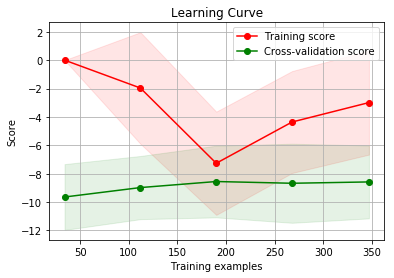

In [192]:
plot_learning_curve(grid, "Learning Curve", X_train, y_train, cv=5)

In [193]:
from sklearn import svm


In [194]:

clf = svm.SVR(C=1)
clf.fit(X_train, y_train)

train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)
train_mse=mean_squared_error(y_train, train_predictions)
test_mse=mean_squared_error(y_test, test_predictions)
print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 2.5384549897492454
Test RMSE: 2.8377430865265367


In [195]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=20, random_state=0, max_depth=3)  
rfr.fit(X_train, y_train)  
train_predictions = rfr.predict(X_train)
test_predictions = rfr.predict(X_test)
train_mse=mean_squared_error(y_train, train_predictions)
test_mse=mean_squared_error(y_test, test_predictions)
print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 2.498282408075347
Test RMSE: 2.7876762841197804


In [196]:
from sklearn.ensemble import GradientBoostingRegressor 

In [197]:
gbr = GradientBoostingRegressor(max_depth=1)
gbr.fit(X_train, y_train)
train_predictions = gbr.predict(X_train)
test_predictions = gbr.predict(X_test)
train_mse=mean_squared_error(y_train, train_predictions)
test_mse=mean_squared_error(y_test, test_predictions)
print("Train RMSE: {}".format(np.sqrt(train_mse)))
print("Test RMSE: {}".format(np.sqrt(test_mse)))

Train RMSE: 2.5498155139556804
Test RMSE: 2.7930136293474623
